In [ ]:
%matplotlib inline



Basic MEG and EEG data processing
=================================

![](http://mne-tools.github.io/stable/_static/mne_logo.png)


MNE-Python reimplements most of MNE-C's (the original MNE command line utils)
functionality and offers transparent scripting.
On top of that it extends MNE-C's functionality considerably
(customize events, compute contrasts, group statistics, time-frequency
analysis, EEG-sensor space analyses, etc.) It uses the same files as standard
MNE unix commands: no need to convert your files to a new system or database.

What you can do with MNE Python
-------------------------------

   - **Raw data visualization** to visualize recordings, can also use
     *mne_browse_raw* for extended functionality (see `ch_browse`)
   - **Epoching**: Define epochs, baseline correction, handle conditions etc.
   - **Averaging** to get Evoked data
   - **Compute SSP projectors** to remove ECG and EOG artifacts
   - **Compute ICA** to remove artifacts or select latent sources.
   - **Maxwell filtering** to remove environmental noise.
   - **Boundary Element Modeling**: single and three-layer BEM model
     creation and solution computation.
   - **Forward modeling**: BEM computation and mesh creation
     (see `ch_forward`)
   - **Linear inverse solvers** (dSPM, sLORETA, MNE, LCMV, DICS)
   - **Sparse inverse solvers** (L1/L2 mixed norm MxNE, Gamma Map,
     Time-Frequency MxNE)
   - **Connectivity estimation** in sensor and source space
   - **Visualization of sensor and source space data**
   - **Time-frequency** analysis with Morlet wavelets (induced power,
     intertrial coherence, phase lock value) also in the source space
   - **Spectrum estimation** using multi-taper method
   - **Mixed Source Models** combining cortical and subcortical structures
   - **Dipole Fitting**
   - **Decoding** multivariate pattern analyis of M/EEG topographies
   - **Compute contrasts** between conditions, between sensors, across
     subjects etc.
   - **Non-parametric statistics** in time, space and frequency
     (including cluster-level)
   - **Scripting** (batch and parallel computing)

What you're not supposed to do with MNE Python
----------------------------------------------

    - **Brain and head surface segmentation** for use with BEM
      models -- use Freesurfer.


<div class="alert alert-info"><h4>Note</h4><p>This package is based on the FIF file format from Neuromag. It
          can read and convert CTF, BTI/4D, KIT and various EEG formats to
          FIF.</p></div>


Installation of the required materials
---------------------------------------

See `install_python_and_mne_python`.

<div class="alert alert-info"><h4>Note</h4><p>The expected location for the MNE-sample data is
    ``~/mne_data``. If you downloaded data and an example asks
    you whether to download it again, make sure
    the data reside in the examples directory and you run the script from its
    current directory.

    From IPython e.g. say::

        cd examples/preprocessing


    %run plot_find_ecg_artifacts.py</p></div>

From raw data to evoked data
----------------------------


Now, launch `ipython`_ (Advanced Python shell) using the QT backend, which
is best supported across systems::

  $ ipython --matplotlib=qt

First, load the mne package:

<div class="alert alert-info"><h4>Note</h4><p>In IPython, you can press **shift-enter** with a given cell
          selected to execute it and advance to the next cell:</p></div>



In [1]:
import mne

If you'd like to turn information status messages off:



In [2]:
mne.set_log_level('WARNING')

But it's generally a good idea to leave them on:



In [3]:
mne.set_log_level('INFO')

You can set the default level by setting the environment variable
"MNE_LOGGING_LEVEL", or by having mne-python write preferences to a file:



In [4]:
mne.set_config('MNE_LOGGING_LEVEL', 'WARNING', set_env=True)

Note that the location of the mne-python preferences file (for easier manual
editing) can be found using:



In [5]:
mne.get_config_path()

'/home/abolfazl/.mne/mne-python.json'

By default logging messages print to the console, but look at
:func:`mne.set_log_file` to save output to a file.

Access raw data
^^^^^^^^^^^^^^^



In [6]:
from mne.datasets import sample  # noqa
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
print(raw_fname)

/home/abolfazl/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif


<div class="alert alert-info"><h4>Note</h4><p>The MNE sample dataset should be downloaded automatically but be
          patient (approx. 2GB)</p></div>

Read data from file:



In [7]:
raw = mne.io.read_raw_fif(raw_fname)
print(raw)
print(raw.info)

Opening raw data file /home/abolfazl/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0
<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~3.6 MB, data not loaded>
<Info | 15 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 GRAD, 102 MAG, 9 STIM, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: 

Look at the channels in raw:



In [8]:
print(raw.ch_names)

['MEG 0113', 'MEG 0112', 'MEG 0111', 'MEG 0122', 'MEG 0123', 'MEG 0121', 'MEG 0132', 'MEG 0133', 'MEG 0131', 'MEG 0143', 'MEG 0142', 'MEG 0141', 'MEG 0213', 'MEG 0212', 'MEG 0211', 'MEG 0222', 'MEG 0223', 'MEG 0221', 'MEG 0232', 'MEG 0233', 'MEG 0231', 'MEG 0243', 'MEG 0242', 'MEG 0241', 'MEG 0313', 'MEG 0312', 'MEG 0311', 'MEG 0322', 'MEG 0323', 'MEG 0321', 'MEG 0333', 'MEG 0332', 'MEG 0331', 'MEG 0343', 'MEG 0342', 'MEG 0341', 'MEG 0413', 'MEG 0412', 'MEG 0411', 'MEG 0422', 'MEG 0423', 'MEG 0421', 'MEG 0432', 'MEG 0433', 'MEG 0431', 'MEG 0443', 'MEG 0442', 'MEG 0441', 'MEG 0513', 'MEG 0512', 'MEG 0511', 'MEG 0523', 'MEG 0522', 'MEG 0521', 'MEG 0532', 'MEG 0533', 'MEG 0531', 'MEG 0542', 'MEG 0543', 'MEG 0541', 'MEG 0613', 'MEG 0612', 'MEG 0611', 'MEG 0622', 'MEG 0623', 'MEG 0621', 'MEG 0633', 'MEG 0632', 'MEG 0631', 'MEG 0642', 'MEG 0643', 'MEG 0641', 'MEG 0713', 'MEG 0712', 'MEG 0711', 'MEG 0723', 'MEG 0722', 'MEG 0721', 'MEG 0733', 'MEG 0732', 'MEG 0731', 'MEG 0743', 'MEG 0742', 'ME

Read and plot a segment of raw data



(376, 2252)
(2252,)


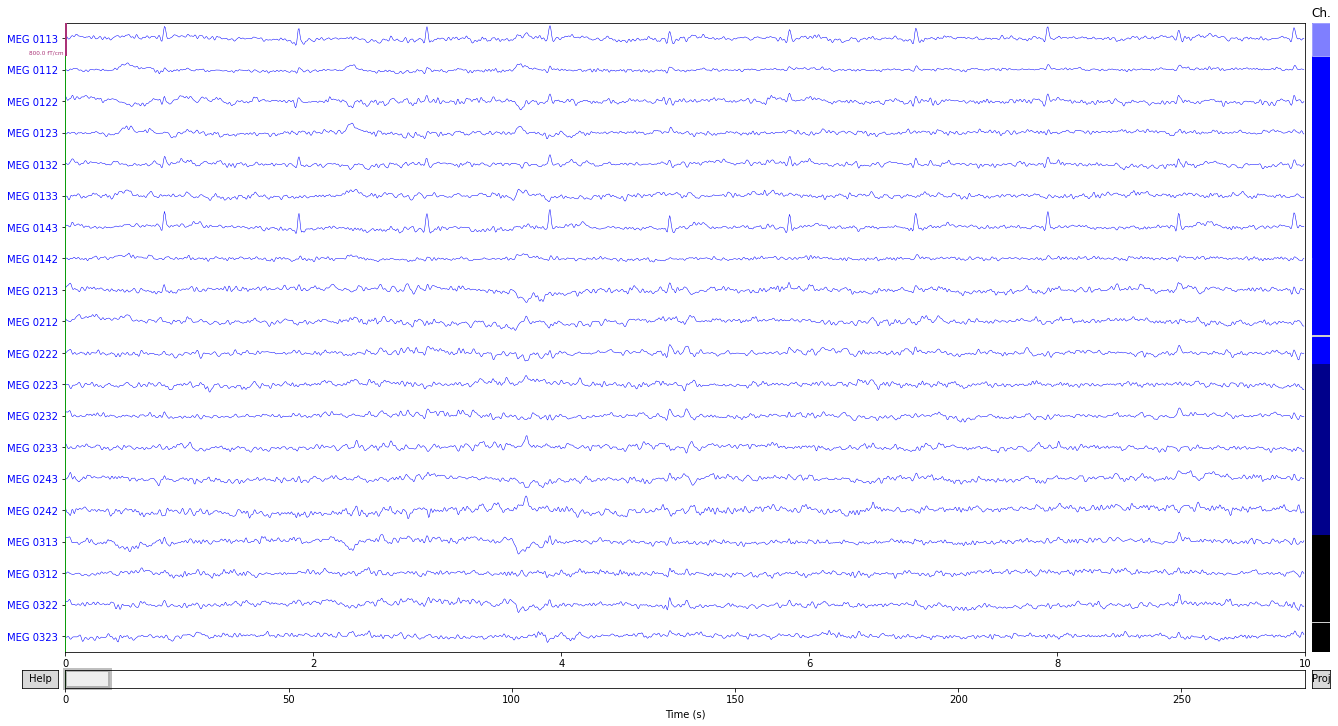

In [8]:
start, stop = raw.time_as_index([100, 115])  # 100 s to 115 s data segment
data, times = raw[:, start:stop]
print(data.shape)
print(times.shape)
data, times = raw[2:20:3, start:stop]  # access underlying data
raw.plot();

Save a segment of 150s of raw data (MEG only):



In [10]:
picks = mne.pick_types(raw.info, meg=True, eeg=False, stim=True,
                       exclude='bads')
raw.save('data/sample_audvis_meg_raw.fif', tmin=0, tmax=150, picks=picks,
         overwrite=True)

Overwriting existing file.
Writing /home/abolfazl/git/mne-python/examples/data/sample_audvis_meg_raw.fif
Closing /home/abolfazl/git/mne-python/examples/data/sample_audvis_meg_raw.fif [done]


Define and read epochs
^^^^^^^^^^^^^^^^^^^^^^

First extract events:



In [11]:
events = mne.find_events(raw, stim_channel='STI 014')
print(events[:5])

319 events found
Event IDs: [ 1  2  3  4  5 32]
[[6994    0    2]
 [7086    0    3]
 [7192    0    1]
 [7304    0    4]
 [7413    0    2]]


Note that, by default, we use stim_channel='STI 014'. If you have a different
system (e.g., a newer system that uses channel 'STI101' by default), you can
use the following to set the default stim channel to use for finding events:



In [12]:
mne.set_config('MNE_STIM_CHANNEL', 'STI101', set_env=True)

Events are stored as a 2D numpy array where the first column is the time
instant and the last one is the event number. It is therefore easy to
manipulate.

Define epochs parameters:



In [13]:
event_id = dict(aud_l=1, aud_r=2)  # event trigger and conditions
tmin = -0.2  # start of each epoch (200ms before the trigger)
tmax = 0.5  # end of each epoch (500ms after the trigger)

Exclude some channels (original bads + 2 more):



In [14]:
raw.info['bads'] += ['MEG 2443', 'EEG 053']

The variable raw.info['bads'] is just a python list.

Pick the good channels, excluding raw.info['bads']:



In [15]:
picks = mne.pick_types(raw.info, meg=True, eeg=True, eog=True, stim=False,
                       exclude='bads')

Alternatively one can restrict to magnetometers or gradiometers with:



In [16]:
mag_picks = mne.pick_types(raw.info, meg='mag', eog=True, exclude='bads')
grad_picks = mne.pick_types(raw.info, meg='grad', eog=True, exclude='bads')

Define the baseline period:



In [17]:
baseline = (None, 0)  # means from the first instant to t = 0

Define peak-to-peak rejection parameters for gradiometers, magnetometers
and EOG:



In [18]:
reject = dict(grad=4000e-13, mag=4e-12, eog=150e-6)

Read epochs:



In [19]:
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                    baseline=baseline, preload=False, reject=reject)
print(epochs)

145 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 4)
4 projection items activated
<Epochs  |   145 events (good & bad), -0.199795 - 0.499488 sec, baseline [None, 0], ~3.6 MB, data not loaded,
 'aud_l': 72
 'aud_r': 73>


Get single epochs for one condition:



In [20]:
epochs_data = epochs['aud_l'].get_data()
print(epochs_data.shape)

Loading data for 72 events and 106 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
17 bad epochs dropped
(55, 365, 106)


epochs_data is a 3D array of dimension (55 epochs, 365 channels, 106 time
instants).

Scipy supports read and write of matlab files. You can save your single
trials with:



In [21]:
from scipy import io  # noqa
io.savemat('data/epochs_data.mat', dict(epochs_data=epochs_data), oned_as='row')

or if you want to keep all the information about the data you can save your
epochs in a fif file:



In [22]:
epochs.save('data/sample-epo.fif')

FileExistsError: Destination file exists. Please use option "overwrite=True" to force overwriting.

and read them later with:



In [23]:
saved_epochs = mne.read_epochs('data/sample-epo.fif')

Reading data/sample-epo.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms
        0 CTF compensation matrices available
116 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 4)
4 projection items activated


Compute evoked responses for auditory responses by averaging and plot it:



<Evoked  |  'aud_l' (average, N=55), [-0.1998, 0.49949] sec, 364 ch, ~3.9 MB>


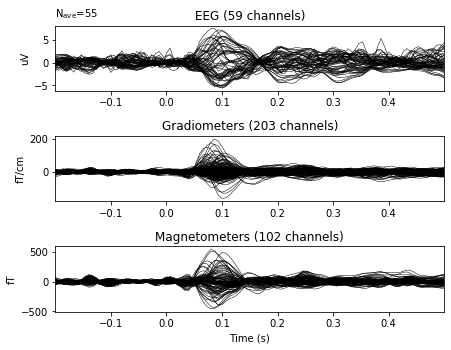

In [29]:
evoked = epochs['aud_l'].average()
print(evoked)
evoked.plot();

.. topic:: Exercise

  1. Extract the max value of each epoch



In [30]:
max_in_each_epoch = [e.max() for e in epochs['aud_l']]  # doctest:+ELLIPSIS
print(max_in_each_epoch[:4])  # doctest:+ELLIPSIS

[1.937516720163134e-05, 1.6405516986429127e-05, 1.8545377810380145e-05, 2.0412807568093327e-05]


It is also possible to read evoked data stored in a fif file:



In [31]:
evoked_fname = data_path + '/MEG/sample/sample_audvis-ave.fif'
evoked1 = mne.read_evokeds(
    evoked_fname, condition='Left Auditory', baseline=(None, 0), proj=True)

Reading /home/abolfazl/mne_data/MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline correction (mode: mean)


Or another one stored in the same file:



In [32]:
evoked2 = mne.read_evokeds(
    evoked_fname, condition='Right Auditory', baseline=(None, 0), proj=True)

Reading /home/abolfazl/mne_data/MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Right Auditory)
        0 CTF compensation matrices available
        nave = 61 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline correction (mode: mean)


Two evoked objects can be contrasted using :func:`mne.combine_evoked`.
This function can use ``weights='equal'``, which provides a simple
element-by-element subtraction (and sets the
``mne.Evoked.nave`` attribute properly based on the underlying number
of trials) using either equivalent call:



In [33]:
contrast = mne.combine_evoked([evoked1, evoked2], weights=[0.5, -0.5])
contrast = mne.combine_evoked([evoked1, -evoked2], weights='equal')
print(contrast)

<Evoked  |  '1.000 * Left Auditory + 1.000 * -Right Auditory' (average, N=28.922413793103452), [-0.1998, 0.49949] sec, 376 ch, ~4.8 MB>


To do a weighted sum based on the number of averages, which will give
you what you would have gotten from pooling all trials together in
:class:`mne.Epochs` before creating the :class:`mne.Evoked` instance,
you can use ``weights='nave'``:



In [34]:
average = mne.combine_evoked([evoked1, evoked2], weights='nave')
print(contrast)

<Evoked  |  '1.000 * Left Auditory + 1.000 * -Right Auditory' (average, N=28.922413793103452), [-0.1998, 0.49949] sec, 376 ch, ~4.8 MB>


Instead of dealing with mismatches in the number of averages, we can use
trial-count equalization before computing a contrast, which can have some
benefits in inverse imaging (note that here ``weights='nave'`` will
give the same result as ``weights='equal'``):



In [35]:
epochs_eq = epochs.copy().equalize_event_counts(['aud_l', 'aud_r'])[0]
evoked1, evoked2 = epochs_eq['aud_l'].average(), epochs_eq['aud_r'].average()
print(evoked1)
print(evoked2)
contrast = mne.combine_evoked([evoked1, -evoked2], weights='equal')
print(contrast)

Dropped 6 epochs
<Evoked  |  'aud_l' (average, N=55), [-0.1998, 0.49949] sec, 364 ch, ~3.9 MB>
<Evoked  |  'aud_r' (average, N=55), [-0.1998, 0.49949] sec, 364 ch, ~3.9 MB>
<Evoked  |  '1.000 * aud_l + 1.000 * -aud_r' (average, N=27.5), [-0.1998, 0.49949] sec, 364 ch, ~3.9 MB>


Time-Frequency: Induced power and inter trial coherence
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Define parameters:



In [24]:
import numpy as np  # noqa
n_cycles = 2  # number of cycles in Morlet wavelet
freqs = np.arange(7, 30, 3)  # frequencies of interest

Compute induced power and phase-locking values and plot gradiometers:



In [ ]:
from mne.time_frequency import tfr_morlet  # noqa
power, itc = tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles,
                        return_itc=True, decim=3, n_jobs=1)
power.plot([power.ch_names.index('MEG 1332')])

Loading data for 145 events and 106 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']


Inverse modeling: MNE and dSPM on evoked and raw data
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Import the required functions:



In [40]:
from mne.minimum_norm import apply_inverse, read_inverse_operator  # noqa

Read the inverse operator:



In [41]:
fname_inv = data_path + '/MEG/sample/sample_audvis-meg-oct-6-meg-inv.fif'
inverse_operator = read_inverse_operator(fname_inv)

Reading inverse operator decomposition from /home/abolfazl/mne_data/MNE-sample-data/MEG/sample/sample_audvis-meg-oct-6-meg-inv.fif...
    Reading inverse operator info...
    [done]
    Reading inverse operator decomposition...
    [done]
    305 x 305 full covariance (kind = 1) found.
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Noise covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 2) found.
    Source covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 6) found.
    Orientation priors read.
    22494 x 22494 diagonal covariance (kind = 5) found.
    Depth priors read.
    Did not find the desired covariance matrix (kind = 3)
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing 

Define the inverse parameters:



In [42]:
snr = 3.0
lambda2 = 1.0 / snr ** 2
method = "dSPM"

Compute the inverse solution:



In [43]:
stc = apply_inverse(evoked, inverse_operator, lambda2, method)

Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 55
    Created the regularized inverter
    Created an SSP operator (subspace dimension = 3)
    Created the whitener using a noise covariance matrix with rank 302 (3 small eigenvalues omitted)
    Computing noise-normalization factors (dSPM)...
[done]
Applying inverse operator to "aud_l"...
    Picked 305 channels from the data
    Computing inverse...
    Eigenleads need to be weighted ...
    Computing residual...
    Explained  59.3% variance
    Combining the current components...
    dSPM...
[done]


Save the source time courses to disk:



In [44]:
stc.save('data/mne_dSPM_inverse')

Writing STC to disk...
[done]


Now, let's compute dSPM on a raw file within a label:



In [45]:
fname_label = data_path + '/MEG/sample/labels/Aud-lh.label'
label = mne.read_label(fname_label)

Compute inverse solution during the first 15s:



In [46]:
from mne.minimum_norm import apply_inverse_raw  # noqa
start, stop = raw.time_as_index([0, 15])  # read the first 15s of data
stc = apply_inverse_raw(raw, inverse_operator, lambda2, method, label,
                        start, stop)

Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 1
    Created the regularized inverter
    Created an SSP operator (subspace dimension = 3)
    Created the whitener using a noise covariance matrix with rank 302 (3 small eigenvalues omitted)
    Computing noise-normalization factors (dSPM)...
[done]
Applying inverse to raw...
    Picked 305 channels from the data
    Computing inverse...
    Eigenleads need to be weighted ...
    combining the current components...
[done]


Save result in stc files:



In [47]:
stc.save('data/mne_dSPM_raw_inverse_Aud')

Writing STC to disk...
[done]


What else can you do?
^^^^^^^^^^^^^^^^^^^^^

    - detect heart beat QRS component
    - detect eye blinks and EOG artifacts
    - compute SSP projections to remove ECG or EOG artifacts
    - compute Independent Component Analysis (ICA) to remove artifacts or
      select latent sources
    - estimate noise covariance matrix from Raw and Epochs
    - visualize cross-trial response dynamics using epochs images
    - compute forward solutions
    - estimate power in the source space
    - estimate connectivity in sensor and source space
    - morph stc from one brain to another for group studies
    - compute mass univariate statistics base on custom contrasts
    - visualize source estimates
    - export raw, epochs, and evoked data to other python data analysis
      libraries e.g. pandas
    - and many more things ...

Want to know more ?
^^^^^^^^^^^^^^^^^^^

Browse `the examples gallery <auto_examples/index.html>`_.



In [48]:
print("Done!")

Done!
